<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/3O4O5_%EA%B9%80%EC%8B%9C%EA%B2%B8_2024_2%ED%95%99%EA%B8%B0_1%EC%B0%A8_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80(CNN_%EC%BB%A4%ED%94%BC%EC%BD%A9_%EB%B6%84%EB%A5%98)(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[ 커피콩 분류문제 해결하기 ]**
---
이 문제에서 사용할 데이터 세트는 네 종류의 커피콩 이미지를 모은 것입니다.
- x_train, x_test는 커피콩 이미지 모음입니다.
- y_train, y_test는 커피콩이 어떤 클래스에 해당하는지 나타내는 레이블입니다.
- 커피콩은 [0: 'Dark',  1:'Green', 2:'Light', 3: 'Medium'] 네 가지 클래스로 분류됩니다.
---

## **0. 필요한 모듈 가져오기**
라이브러리 및 모듈은 이 곳에서 한 번에 가져와도 되고 필요한 셀에서 바로 추가해도 됩니다.

In [ ]:
import numpy as np
import pandas as pd

## **1. 데이터 가져오기**
아래 코드를 실행하여 데이터를 읽어오세요. (변수명은 원한다면 변경해도 됩니다.)

In [ ]:
# 데이터 가져오기
x_train = np.load('/content/x_train.npy', allow_pickle=True)
y_train = np.load('/content/y_train.npy', allow_pickle=True)
x_test = np.load('/content/x_test.npy', allow_pickle=True)
y_test = np.load('/content/y_test.npy', allow_pickle=True)

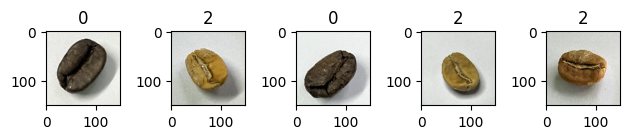

In [ ]:
# 다섯 개(0번~4번)의 데이터 샘플 이미지와 레이블 출력하기
import matplotlib.pyplot as plt

for n in range(0, 5):
  plt.subplot(1, 5, n+1) # (columns, rows, index)
  plt.imshow(x_train[n]/255, cmap=plt.cm.gray)
  plt.title(str(y_train[n]))
plt.tight_layout()
plt.show()

##**2. 데이터 준비 및 분석하기**
문제 상황에 맞게 아래 작업을 수행하세요.
#### (과제1) 데이터 탐색 <br>
- 데이터 형태, 차원 확인하기


In [ ]:
# (과제1-1) 데이터 탐색 (데이터의 형태, 차원 확인하기)
print("훈련용 데이터 x_train 와 y_train의 형태:", x_train.shape, y_train.shape  )
print("테스트용 데이터 x_test와 y_test의 형태:", x_test.shape, y_test.shape   )

print("훈련용 데이터 x_train 와 y_train의 차원:", x_train.ndim, y_train.ndim   )
print("테스트용 데이터  x_test와 y_test의 차원:", x_test.ndim, y_test.ndim   )

훈련용 데이터 x_train 와 y_train의 형태: (1200, 150, 150, 3) (1200,)
테스트용 데이터 x_test와 y_test의 형태: (400, 150, 150, 3) (400,)
훈련용 데이터 x_train 와 y_train의 차원: 4 1
테스트용 데이터  x_test와 y_test의 차원: 4 1



####(과제2) 데이터 전처리
- 데이터 형태 변형, 데이터정규화, 원-핫인코딩
- **단, 필요하지 않다면 특정 단계를 생략할 수 있음.**

In [ ]:
# (과제2-1) 데이터 전처리 (데이터 형태 변형, 데이터정규화)
x_train = x_train/255
x_test = x_test/255

In [ ]:
# 데이터 전처리가 잘 되었는지 출력하여 확인하시오. (예시) 0.0, 1.0
print("정규화한 결과 확인(1): ", x_train.min(), x_train.max())
print("정규화한 결과 확인(2): ", x_test.min(), x_test.max())

정규화한 결과 확인(1):  0.0 1.0
정규화한 결과 확인(2):  0.0 1.0


In [ ]:
# (과제2-2) 데이터 전처리 (원-핫 인코딩하기)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 데이터 전처리가 잘 되었는지 출력하여 확인하시오. (예시) [1. 0. 0. 0.]
print("y_train[0]의 출력결과:", y_train[0])

y_train[0]의 출력결과: [1. 0. 0. 0.]


##**3. 모델 학습시키기**
문제 상황에 맞게 아래 작업을 수행하세요.
####(과제3) 신경망 모델 생성 (신경망 구조,레이어 추가)
- **조건1**: 합성곱 층은 (3, 3) 크기의 필터 32장으로 구성된다. 패딩을 사용하고, 활성화함수는 relu를 사용한다. 스트라이드는 (1,1)로 설정한다.
- **조건2**: 풀링 층은 특정 영역값의 최대값을 구하는 풀링방법을 사용한다. 풀링의 크기는 (2,2)로 한다.
- **조건3**: 은닉층은 512개의 유닛으로 구성되고, 활성화함수는 relu를 사용한다.
- **조건4**: 출력층의 활성화함수는 softmax를 사용한다.


In [ ]:
# (과제3) 신경망 모델생성 (신경망 구조,레이어 추가)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
# 요약정보 확인하기
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 180000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │      92,160,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,163,460 (351.58 MB)

 Trainable params: 92,163,460 (351.58 MB)

 Non-trainable params: 0 (0.00 B)



####(과제4) 신경망 모델 학습 (학습방식설정 및 학습)<br>

- **조건1**: 학습방식의 손실값은 categorical_crossentropy로, 옵티마이저는 RMSprop으로, 학습지표는 ['accuracy']로 설정한다.
- **조건2**: 학습할 때 epoch횟수와 배치크기는 각각 30, 500으로 한다.

In [ ]:
# (과제4) 신경망 모델학습  (학습방식설정 및 학습)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=500, epochs=30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2470 - loss: 240.6548
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.2396 - loss: 115.6102
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.2467 - loss: 55.8979
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.2737 - loss: 20.4868
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.3441 - loss: 10.0144
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.2651 - loss: 16.9217
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.2942 - loss: 13.3028
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6098 - loss: 2.9984
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5005 - loss: 4.4267
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5105 - loss: 3.1771
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.6272 - loss: 3.0183
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.70

##**4. 모델 평가하기**
문제 상황에 맞게 아래 작업을 수행하세요.
#### (과제5) 모델 성능 평가: 손실값과 정확도 출력

In [ ]:
# (과제5) 모델성능평가하기 (예시) 0.444624, 0.81000
loss, score= model.evaluate(x_train, y_train)
print("손실값:", loss)
print("정확도:", score)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9761 - loss: 0.0951
손실값: 0.09965404123067856
정확도: 0.9691666960716248


##**5. 모델 활용하기**
문제 상황에 맞게 <u>아래 작업 중 하나 이상</u>을 수행하세요.
#### (과제6) 테스트 데이터의 분류 결과 확인
- **조건**: x_test[5]번 이미지를 (1,150,150,3)으로 형태 변환한 후 예측함수에 사용

In [ ]:
# (과제6) 테스트 샘플 분류 결과 확인하기
y_prob = model.predict(x_test[5].reshape(1, 150, 150, 3))
y_pred = y_prob.argmax(axis=-1)
print('이 원두 이미지는', y_pred, '번 클래스입니다.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
이 원두 이미지는 [2] 번 클래스입니다.


실제 답은 2 번 클래스입니다.



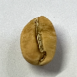

In [ ]:
# 테스트 샘플 이미지와 레이블 출력하기
print('실제 답은', y_test[5].tolist().index(1), '번 클래스입니다.\n')

plt.figure(figsize = (1, 1))
plt.rcParams['savefig.pad_inches'] = 0
plt.axis('off')
plt.imshow(x_test[5], cmap=plt.cm.gray)
plt.show()